Project idea- To plot the probability of a goal based on its x and y coordinates for sample data from 3 major football leagues.

The overall plan is as follows= 
1. Import pickle package to read pickle files obtained from Github who has obtained the same from statsbomb.com
2. Obtain user input- which league's data does the user want to see?
3. Based on user input- choose the file from which data will be extracted and extract all data as variable shot_data
4. Then extract x coordinate, y coordinate and xG of shot (probability of goal) from the shot_data.
5. Scale the x coordinate and y coordinate of shot based on the standard football pitch size= 130 by 90 units
6. Create a polyfit model for fitting xG curve based on x coordinates (separately) and y coordinates (separately).
7. Create a scatterplot for xG and x coordinates (separately and y coordinates (separately), and plot the curves on them separately
8. Create a football pitch using matplotlib and the exact dimensions of the pitch on which we want to plot the data- and plot x coordinates, y coordinates and xG of shot data on the pitch.
9. Take user input for x- or y- coordinates (within the range of data) and feed it to the xG model to get predictions of xG.


///////TERMINOLOGY ALERT////////

1. A shot in football= involves the entire process of movement of ball after being kicked with the purpose of beating the goalkeeper and scoring a goal. A shot can either result in a goal or no goal
2. x- and y- coordinate of a shot= The position on the pitch from where the shot was taken.
3. xG= It is a probability model that uses various metrics of a shot such as shot location, type of shot taken, body part used for the shot, angle of shot, etc. to predict the probability of scoring a goal from that shot. 
4. Pickling and unpickling = Pickling refers to storing a python object such as a list, tuple, dictionary, dataframe etc. in the form of a file so that it can be transferred across systems and used in different programs. Unpickling is the process of reading the file and obtaining the required python object from it so that we can use it in our code.
5. Dataframes, vectors, and other misc. terms- will be explained by ME!

In [10]:
#Extract data from pickle files
import pickle
print(" Welcome to Soccer-plots! We design plots based on shot data from UCL, La Liga and Premier League.")
print("Data obtained from Statsbomb- credits to Slothfulwave612 (Github)- https://github.com/Slothfulwave612/xG-Model")

user_in= input("Enter UCL for UCL plot, PL for Premier League plot, and La Liga for La Liga plot.")

if user_in== 'UCL':
    infile = open('Champions_League_shots.pkl','rb')
    
elif user_in== 'PL':
    infile = open('Premier_League_shots.pkl','rb')
    
elif user_in== 'La Liga':
    infile = open('La_Liga_shots.pkl','rb')
    
else:
    print("No data found!")
shot_data = pickle.load(infile)
infile.close()
shot_data

 Welcome to Soccer-plots! We design plots based on shot data from UCL, La Liga and Premier League.
Data obtained from Statsbomb- credits to Slothfulwave612 (Github)- https://github.com/Slothfulwave612/xG-Model
Enter UCL for UCL plot, PL for Premier League plot, and La Liga for La Liga plot.UCL


,shot_statsbomb_xg,player_name,comp_name,shot_type_name,body_part,target,x,y
1,0.018768,Moussa Sissoko,Champions League-2018/2019,Open Play,Foot,0,79.646667,31.365
2,0.011494,Trent Alexander-Arnold,Champions League-2018/2019,Open Play,Foot,0,78.173333,17.595
3,0.037931,Mohamed Salah,Champions League-2018/2019,Open Play,Foot,0,82.506667,27.880
4,0.009835,Mohamed Salah,Champions League-2018/2019,Open Play,Foot,0,97.933333,17.425
5,0.014247,Andrew Robertson,Champions League-2018/2019,Open Play,Foot,0,85.280000,50.660
...,...,...,...,...,...,...,...,...
451,0.292457,Dmitriy Alenichev,Champions League-2003/2004,Open Play,Foot,1,95.506667,42.670
452,0.016749,Sébastien Squillaci,Champions League-2003/2004,Open Play,Foot,0,76.093333,33.065
453,0.110755,Patrice Evra,Champions League-2003/2004,Open Play,Foot,0,96.546667,44.455
454,0.035852,Sébastien Squillaci,Champions League-2003/2004,Open Play,Head,0,96.633333,31.875


In [12]:
#Obtaining shot data= shot location and xG
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Explain .iloc here
shot_x= shot_data.iloc[:, 6:7] + 25
shot_y= shot_data.iloc[:,7:8] + 15
shot_loc= pd.concat([shot_x, shot_y], axis= 1)
shot_xG= shot_data.iloc[:,0:1]
shot_x
#shot_y
#shot_xG

#shot_loc
#shot_x.max()
#shot_y.max()

,x
1,104.646667
2,103.173333
3,107.506667
4,122.933333
5,110.280000
...,...
451,120.506667
452,101.093333
453,121.546667
454,121.633333


In [13]:
#converting dataframes to vectors
shot_xvector= np.squeeze(shot_x.to_numpy())
shot_yvector= np.squeeze(shot_y.to_numpy())
shot_xGvector= np.squeeze(shot_xG.to_numpy())

    
#fitting xG data as a polynomial curve based on coordinate vectors and storing in xG model- explain polyfit here
xGmodel_x = np.poly1d(np.polyfit(shot_xvector, shot_xGvector, 5))
xGmodel_y = np.poly1d(np.polyfit(shot_yvector, shot_xGvector, 5))

def reg_plots():

    #Range of x and y coordinates defined must be global for them to be accessed outside the function for prediction
    global range_x
    global range_y
    
    if user_in=='UCL':

        #getting 100 values of x coordinate between 96 and 127 (as most UCL data is within that range)
        myline_x = np.linspace(96,127,100)
        #getting 100 values of y coordinate between 29 and 65 (as most UCL data is within that range)
        myline_y = np.linspace(29,65,100)
        #range of x coordinates- UCL
        range_x= np.arange(96,127,0.5).tolist()
        #range of y coordinates- UCL
        range_y= np.arange(29,65,0.5).tolist()

    elif user_in== 'PL':
        #getting 100 values of x coordinate between 96 and 127 (as most PL data is within that range)
        myline_x = np.linspace(96,127,100)
        #getting 100 values of y coordinate between 29 and 65 (as most PL data is within that range)
        myline_y = np.linspace(31,67,100)
        #range of x coordinates- PL
        range_x= np.arange(96,127,0.5).tolist()
        #range of y coordinates- PL
        range_y= np.arange(31,67,0.5).tolist()
    
    elif user_in== 'La Liga':
        #getting 100 values of x coordinate between 80 and 127 (as most La Liga data is within that range)
        myline_x = np.linspace(80,127,100)
        #getting 100 values of y coordinate between 32 and 66 (as most La Liga data is within that range)
        myline_y = np.linspace(32,66,100)
        #range of x coordinates- La Liga
        range_x= np.arange(80,127,0.5).tolist()
        #range of y coordinates- La Liga
        range_y= np.arange(32,66,0.5).tolist()
    
    else:
        print("Oops! We couldn't find your desired league- because it's too cool for us to plot!")
    
    #first subplot showing x coordinate and xG- with line in red colour
    plt.subplot(1,2,1)
    plt.scatter(shot_xvector, shot_xGvector, s=0.5)
    plt.plot(myline_x, xGmodel_x(myline_x), color='r')
    plt.xlabel("X-coordinate of shot")
    plt.ylabel("xG of shot")
    plt.title("X-coordinate of shot vs xG")

    #second subplot showing y coordinate and xG- with line in red colour
    plt.subplot(1,2,2)
    plt.scatter(shot_yvector, shot_xGvector, s=0.5)
    plt.plot(myline_y, xGmodel_y(myline_y), color='r')
    plt.xlabel("Y-coordinate of shot")
    plt.ylabel("xG of shot")
    plt.title("Y-coordinate of shot vs xG")

    sup_title= user_in + " shot coordinates vs xG"
    #overall title for the plots in bold
    plt.suptitle(sup_title, fontweight= 'bold')
    
    #adjust subplots to avoid them overlapping on each other
    plt.subplots_adjust(wspace= 0.3, hspace= 0.3)
    
    #showing plots
    plt.show()



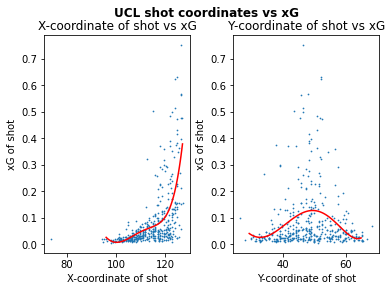

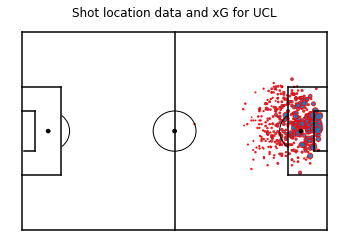

In [14]:

#plotting pitch and shot locations on pitch along with xG of each shot
from matplotlib.patches import Arc
def createPitch():
    
    #Create figure
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)

    #Pitch Outline & Centre Line
    plt.plot([0,0], [0,90], color="black")
    plt.plot([0,130], [90,90], color="black")
    plt.plot([130,130], [90,0], color="black")
    plt.plot([130,0], [0,0], color="black")
    plt.plot([65,65], [0,90], color="black")
    
    #Left Penalty Area
    plt.plot([16.5,16.5], [65,25], color="black")
    plt.plot([0,16.5], [65,65], color="black")
    plt.plot([16.5,0], [25,25], color="black")
    
    #Right Penalty Area
    plt.plot([130,113.5], [65,65], color="black")
    plt.plot([113.5,113.5], [65,25], color="black")
    plt.plot([113.5,130], [25,25], color="black")
    
    #Left 6-yard Box
    plt.plot([0,5.5], [54,54], color="black")
    plt.plot([5.5,5.5], [54,36], color="black")
    plt.plot([5.5,0.5], [36,36], color="black")
    
    #Right 6-yard Box
    plt.plot([130,124.5], [54,54], color="black")
    plt.plot([124.5,124.5], [54,36], color="black")
    plt.plot([124.5,130], [36,36], color="black")
    
    #Prepare Circles
    centreCircle = plt.Circle((65,45), 9.15, color="black", fill=False)
    centreSpot = plt.Circle((65,45), 0.8, color="black")
    leftPenSpot = plt.Circle((11,45), 0.8, color="black")
    rightPenSpot = plt.Circle((119,45), 0.8, color="black")
    
    #Draw Circles
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
    ax.add_patch(leftPenSpot)
    ax.add_patch(rightPenSpot)
    
    #Prepare Arcs
    leftArc = Arc((11,45), height=18.3, width=18.3, angle=0, theta1=310, theta2=50, color="black")
    rightArc = Arc((119,45), height=18.3, width=18.3, angle=0, theta1=130, theta2=230, color="black")

    #Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)
    
    #Tidy Axes
    plt.axis('off')
    
    #Plot points
    plt.scatter(shot_xvector, shot_yvector, s= shot_xGvector*100, edgecolors='red', alpha=0.9)
    
    #Title of plot
    plt.title("Shot location data and xG for "+ user_in)
    
    #Display Pitch
    plt.show()

reg_plots()
createPitch()



In [16]:
#predicting xG value based on x coordinate or y coordinate of shot
print("Soccer-plots is trying out a new feature! You can predict xG values for a shot by entering its x or y coordinate!")
coordinate_choice= input("Enter x for x coordinate or y for y coordinate of shot: ")

#for x input= take user input x coordinate and give output
if coordinate_choice== 'x':
    coordinate_value= int(input("Enter x-coordinate: "))
    if coordinate_value in range_x:
        print("xG for given x-coordinate= ", xGmodel_x(coordinate_value))
    else:
        print("Data invalid or out of range!")
    
#for y input= take user input y coordinate and give output
elif coordinate_choice== 'y':
    coordinate_value= int(input("Enter y-coordinate: "))
    if coordinate_value in range_y:
        print("xG for given y-coordinate= ", xGmodel_y(coordinate_value))
    else:
        print("Data invalid or out of range!")
        
else:
    print("Error! no such coordinate exists!")

Soccer-plots is trying out a new feature! You can predict xG values for a shot by entering its x or y coordinate!
Enter x for x coordinate or y for y coordinate of shot: x
Enter x-coordinate: 120
xG for given x-coordinate=  0.10371590797637964


In [31]:
range_x


[96.0,
 96.5,
 97.0,
 97.5,
 98.0,
 98.5,
 99.0,
 99.5,
 100.0,
 100.5,
 101.0,
 101.5,
 102.0,
 102.5,
 103.0,
 103.5,
 104.0,
 104.5,
 105.0,
 105.5,
 106.0,
 106.5,
 107.0,
 107.5,
 108.0,
 108.5,
 109.0,
 109.5,
 110.0,
 110.5,
 111.0,
 111.5,
 112.0,
 112.5,
 113.0,
 113.5,
 114.0,
 114.5,
 115.0,
 115.5,
 116.0,
 116.5,
 117.0,
 117.5,
 118.0,
 118.5,
 119.0,
 119.5,
 120.0,
 120.5,
 121.0,
 121.5,
 122.0,
 122.5,
 123.0,
 123.5,
 124.0,
 124.5,
 125.0,
 125.5,
 126.0,
 126.5]